In [2]:
import pandas as pd
import os
import xarray as xr

## Data Reading

In [3]:
df_mapping = pd.read_csv("../../data/processed/mapping/no2_to_traffic_sensor_mapping.csv")

df_air = pd.read_parquet("../../data/processed/air/df_air_quality_and_locations_from_2013.parquet")

Read traffic data

In [4]:
# Define the root directory for processed traffic data
root_dir = '../../data/processed/traffic'

# List to hold DataFrames
dataframes = []

# Iterate through all folders in the root directory
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    
    # Check if the folder exists and is a directory
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")
        
        # Iterate through all files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.parquet'):  # Ensure it's a Parquet file
                file_path = os.path.join(folder_path, file_name)
                
                # Read the Parquet file
                try:
                    df = pd.read_parquet(file_path)
                    print(f"Successfully read: {file_path} with {len(df)} rows.")
                    
                    # Append the DataFrame to the list
                    dataframes.append(df)
                    
                except Exception as e:
                    print(f"Error reading file {file_name}: {e}")

# Concatenate all DataFrames into one
if dataframes:  # Check if the list is not empty
    df_traffic = pd.concat(dataframes, ignore_index=True)
    print(f"Combined DataFrame created with {len(df_traffic)} rows.")

Processing folder: ../../data/processed/traffic/2022
Successfully read: ../../data/processed/traffic/2022/12-2022_processed.parquet with 48331 rows.
Successfully read: ../../data/processed/traffic/2022/11-2022_processed.parquet with 46722 rows.
Successfully read: ../../data/processed/traffic/2022/10-2022_processed.parquet with 47576 rows.
Successfully read: ../../data/processed/traffic/2022/01-2022_processed.parquet with 45047 rows.
Successfully read: ../../data/processed/traffic/2022/06-2022_processed.parquet with 42196 rows.
Successfully read: ../../data/processed/traffic/2022/05-2022_processed.parquet with 42735 rows.
Successfully read: ../../data/processed/traffic/2022/08-2022_processed.parquet with 45087 rows.
Successfully read: ../../data/processed/traffic/2022/02-2022_processed.parquet with 40460 rows.
Successfully read: ../../data/processed/traffic/2022/03-2022_processed.parquet with 44372 rows.
Successfully read: ../../data/processed/traffic/2022/09-2022_processed.parquet with

In [5]:
# Define the root directory for processed traffic data
root_dir = '../../data/raw/meteo'

# List to hold DataFrames
dataframes = []

# Iterate through all folders in the root directory
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    
    # Check if the folder exists and is a directory
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")
        
        # Iterate through all files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.grib'):  # Ensure it's a GRIB file
                file_path = os.path.join(folder_path, file_name)
                
                # Read the file
                try:                    
                    df = xr.open_dataset(file_path, engine='cfgrib',  backend_kwargs={'indexpath': None})
                    print(f"Successfully read: {file_path} with {len(df)} rows.")
                    
                    df = df.to_dataframe().reset_index()  # Reset index if needed
                    df = df[df['d2m'].notna()]
                    
                    # Append the DataFrame to the list
                    dataframes.append(df)
                    
                except Exception as e:
                    print(f"Error reading file {file_name}: {e}")

# Concatenate all DataFrames into one
if dataframes:  # Check if the list is not empty
    df_meteo = pd.concat(dataframes, ignore_index=True)
    print(f"Combined DataFrame created with {len(df_meteo)} rows.")

Processing folder: ../../data/raw/meteo/2013
Successfully read: ../../data/raw/meteo/2013/62bc958b7dfd5f0fd66790535255fdcc.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/ffa3eb01f41b6b867176ab7d6c86c36c.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/b7c4931dbcd0dc31c51479f26fc69edf.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/eee6c89231dec25508bea7cdf1cbf740.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/ddadcac45ee7083336adc489c0f1f01f.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/1360c89e22b9804a0721de5cb09a2b64.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/e215fff01bb60bb2e69e7fd29eef3231.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/c3e08645e5b5a7e6112b1312ca3c96d5.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/4b18f4ae5616f7e8f4f335741738e89d.grib with 8 rows.
Successfully read: ../../data/raw/meteo/2013/1c4334f2220f5b65d61a35db9cbdf362.grib with 8 r

## Data Cleaning

In [6]:
unnecesary_cols = ['PROVINCIA','MUNICIPIO','ESTACION','MAGNITUD','PUNTO_MUESTREO','CODIGO_CORTO','LOCALIZACION','DIRECCION','COD_VIA','COD_TIPO']

df_air = df_air.drop(columns = unnecesary_cols)
df_air.columns = df_air.columns.str.lower()
df_air = df_air.rename(columns = {'codigo':'id_no2'})

In [7]:
df_air['id_no2'] = df_air['id_no2'].astype(str)
df_mapping['id_trafico'] = df_mapping['id_trafico'].astype(str)
df_mapping['id_no2'] = df_mapping['id_no2'].astype(str)

In [8]:
df_traffic = df_traffic.rename(columns = {'hora': 'fecha'})

In [9]:
df_meteo = df_meteo.rename(columns = {'valid_time':'fecha'})
df_meteo = df_meteo.drop(columns = ['time','step','surface'])

In [12]:
df_meteo.drop(columns = ['number']).to_parquet("all_meteo.parquet", index = False)

In [13]:
df_meteo = df_meteo.drop(columns = ['number'])

In [10]:
df_meteo = df_meteo[(df_meteo['latitude'] == 40.7) & (df_meteo['longitude'] == -3.7)]

In [22]:
# get the unique values of the longitude and latitude of the air quality data

df_air_locations = df_air[['longitud','latitud']].drop_duplicates().reset_index(drop = True)
df_meteo_locations = df_meteo[['longitude','latitude']].drop_duplicates().reset_index(drop = True)

# shown both locations inside a map

In [25]:
import folium

# Crear un mapa centrado en la ubicación promedio
center_lat = (df_air_locations['latitud'].mean() + df_meteo_locations['latitude'].mean()) / 2
center_lon = (df_air_locations['longitud'].mean() + df_meteo_locations['longitude'].mean()) / 2

# Crear el mapa base
m = folium.Map(location=[center_lat, center_lon], zoom_start=11, 
               tiles='CartoDB positron')

# Añadir marcadores para todas las estaciones de calidad del aire (azul)
for idx, row in df_air_locations.iterrows():
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=f"""
        <b>Estación de aire #{idx}</b><br>
        Latitud: {row['latitud']:.6f}<br>
        Longitud: {row['longitud']:.6f}
        """,
        icon=folium.Icon(color='blue', icon='info-sign'),
        tooltip="Estación de calidad del aire"
    ).add_to(m)

# Añadir marcadores para todas las estaciones meteorológicas (rojo)
for idx, row in df_meteo_locations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"""
        <b>Estación meteorológica #{idx}</b><br>
        Latitud: {row['latitude']:.6f}<br>
        Longitud: {row['longitude']:.6f}
        """,
        icon=folium.Icon(color='red', icon='cloud'),
        tooltip="Estación meteorológica"
    ).add_to(m)

# Añadir leyenda al mapa
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; right: 50px; width: 220px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; padding: 10px;
     border-radius: 5px;">
     &nbsp; <b>Leyenda</b> <br>
     &nbsp; <i class="fa fa-info-sign fa-2x" style="color:blue"></i>&nbsp; Estaciones de aire<br>
     &nbsp; <i class="fa fa-cloud fa-2x" style="color:red"></i>&nbsp; Estaciones meteorológicas
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Mostrar el mapa
m

vamos a quedarnos solo con las estaciones que nos interesan (de momento):

estacion 1

- latitud: 40.5
- longitud -3.7

TODO: posteriormente podemos sacar datos mas precisos.

In [27]:
df_meteo = df_meteo[df_meteo['latitude'] == 40.5]
df_meteo = df_meteo[df_meteo['longitude'] == -3.7]

In [35]:
df_meteo = df_meteo.rename(columns = {'longitude':'longitud_meteo','latitude':'latitud_meteo'})

In [36]:
df_meteo.to_parquet("meteo_data_one_station.parquet", index = False)

Joining the data

In [37]:
df = pd.merge(df_air, df_mapping, how = 'left', left_on='id_no2', right_on='id_no2')
df = pd.merge(df, df_traffic, how = 'inner', left_on=['id_trafico','fecha'], right_on=['id_trafico','fecha'])

In [38]:
df = pd.merge(df, df_meteo, how = 'inner', left_on=['fecha'], right_on=['fecha'])

In [39]:
df.to_parquet("no2_with_traffic_and_meteo_one_station.parquet", index=False)

## Gestionar outliers y valores faltantes

Periodo: 2018-01-01 00:00:00 a 2024-12-01 00:00:00
Total de horas en el periodo: 60625
Horas con datos: 58766 (96.93%)
Horas sin datos: 1859 (3.07%)


/var/folders/kc/t6c9n8gj7mbblj0w7sy3ykwm0000gn/T/ipykernel_81765/2613400981.py:18: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



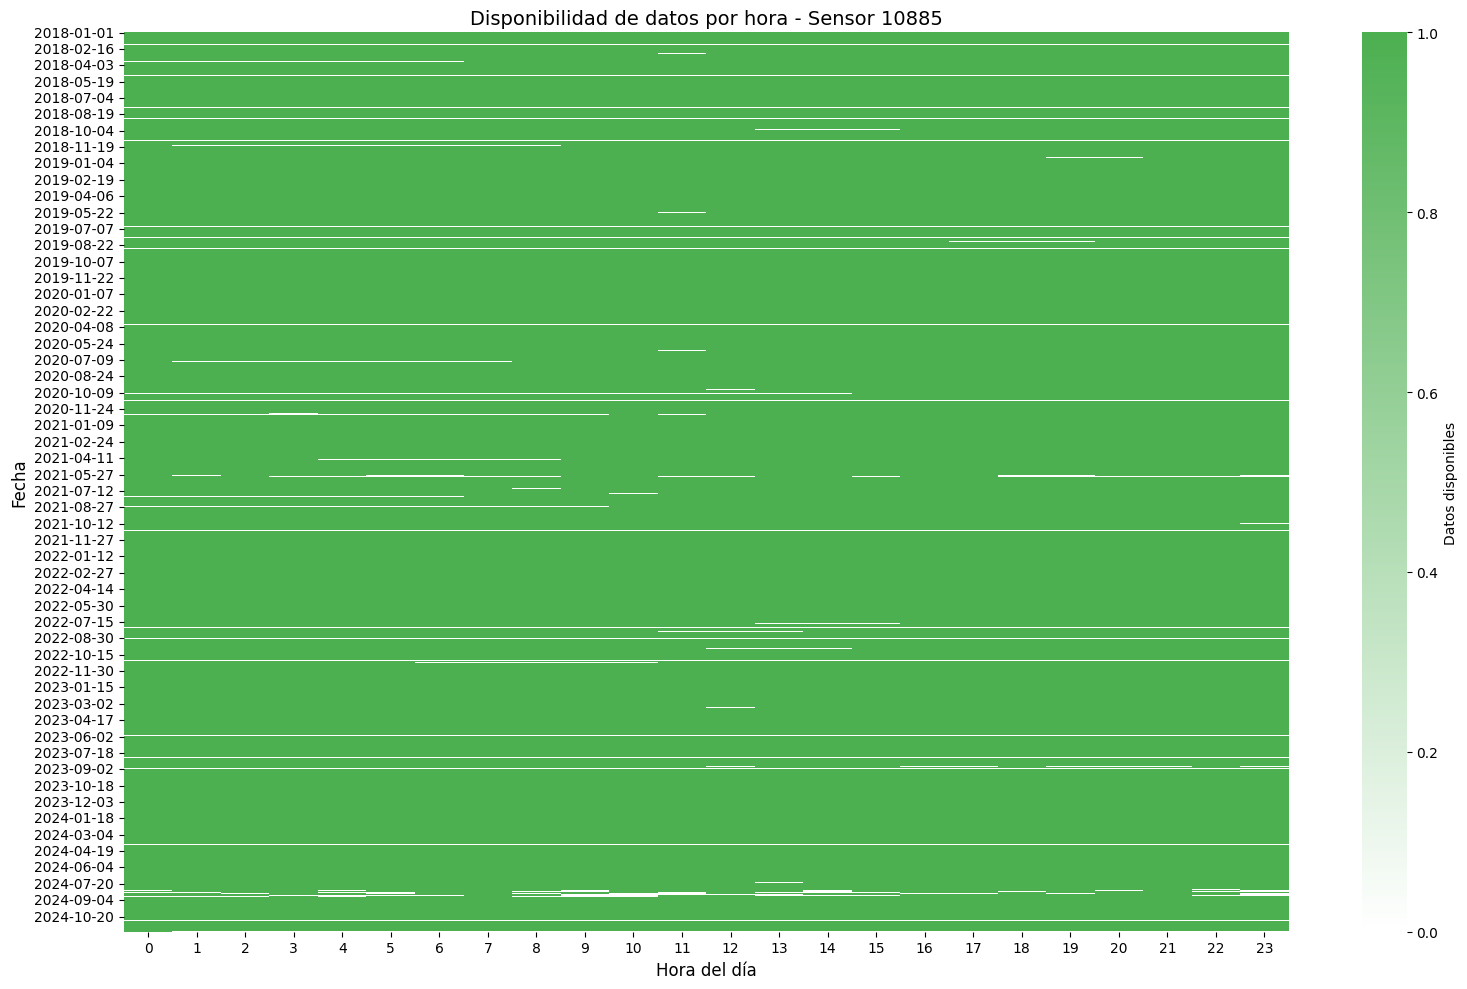

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Filtrar para el ID específico
df_sensor = df[df['id_trafico'] == '5084'].copy()

# Asegurarse que las fechas estén en formato datetime
fecha_col = 'fecha'  # Ajusta al nombre real de tu columna de fecha
if not pd.api.types.is_datetime64_any_dtype(df_sensor[fecha_col]):
    df_sensor[fecha_col] = pd.to_datetime(df_sensor[fecha_col])

# Crear un índice de todas las horas que deberían existir
fecha_min = df_sensor[fecha_col].min()
fecha_max = df_sensor[fecha_col].max()
todas_horas = pd.date_range(start=fecha_min, end=fecha_max, freq='H')

# Crear DataFrame con todas las horas
df_completo = pd.DataFrame(index=todas_horas)
df_completo.index.name = 'hora'

# Marcar las horas que existen en los datos originales
df_sensor_hora = df_sensor.set_index(fecha_col)
df_completo['tiene_datos'] = df_completo.index.isin(df_sensor_hora.index).astype(int)

# Calcular estadísticas de completitud
total_horas = len(todas_horas)
horas_con_datos = df_completo['tiene_datos'].sum()
porcentaje_completitud = (horas_con_datos / total_horas) * 100

print(f"Periodo: {fecha_min} a {fecha_max}")
print(f"Total de horas en el periodo: {total_horas}")
print(f"Horas con datos: {horas_con_datos} ({porcentaje_completitud:.2f}%)")
print(f"Horas sin datos: {total_horas - horas_con_datos} ({100-porcentaje_completitud:.2f}%)")

# Visualizar huecos temporales por día y hora
df_completo['fecha'] = df_completo.index.date
df_completo['hora_dia'] = df_completo.index.hour

# Crear matriz para heatmap (días x horas)
matriz_datos = df_completo.pivot_table(
    index=df_completo.index.date, 
    columns='hora_dia', 
    values='tiene_datos', 
    aggfunc='first'
)

# Crear mapa de calor para visualizar presencia/ausencia de datos
plt.figure(figsize=(16, 10))
cmap = LinearSegmentedColormap.from_list('datos', ['#FFFFFF', '#4CAF50'])
ax = sns.heatmap(matriz_datos, cmap=cmap, cbar_kws={'label': 'Datos disponibles'})
ax.set_title(f'Disponibilidad de datos por hora - Sensor {10885}', fontsize=14)
ax.set_xlabel('Hora del día', fontsize=12)
ax.set_ylabel('Fecha', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/kc/t6c9n8gj7mbblj0w7sy3ykwm0000gn/T/ipykernel_81765/1114446326.py:15: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1600x1000 with 0 Axes>

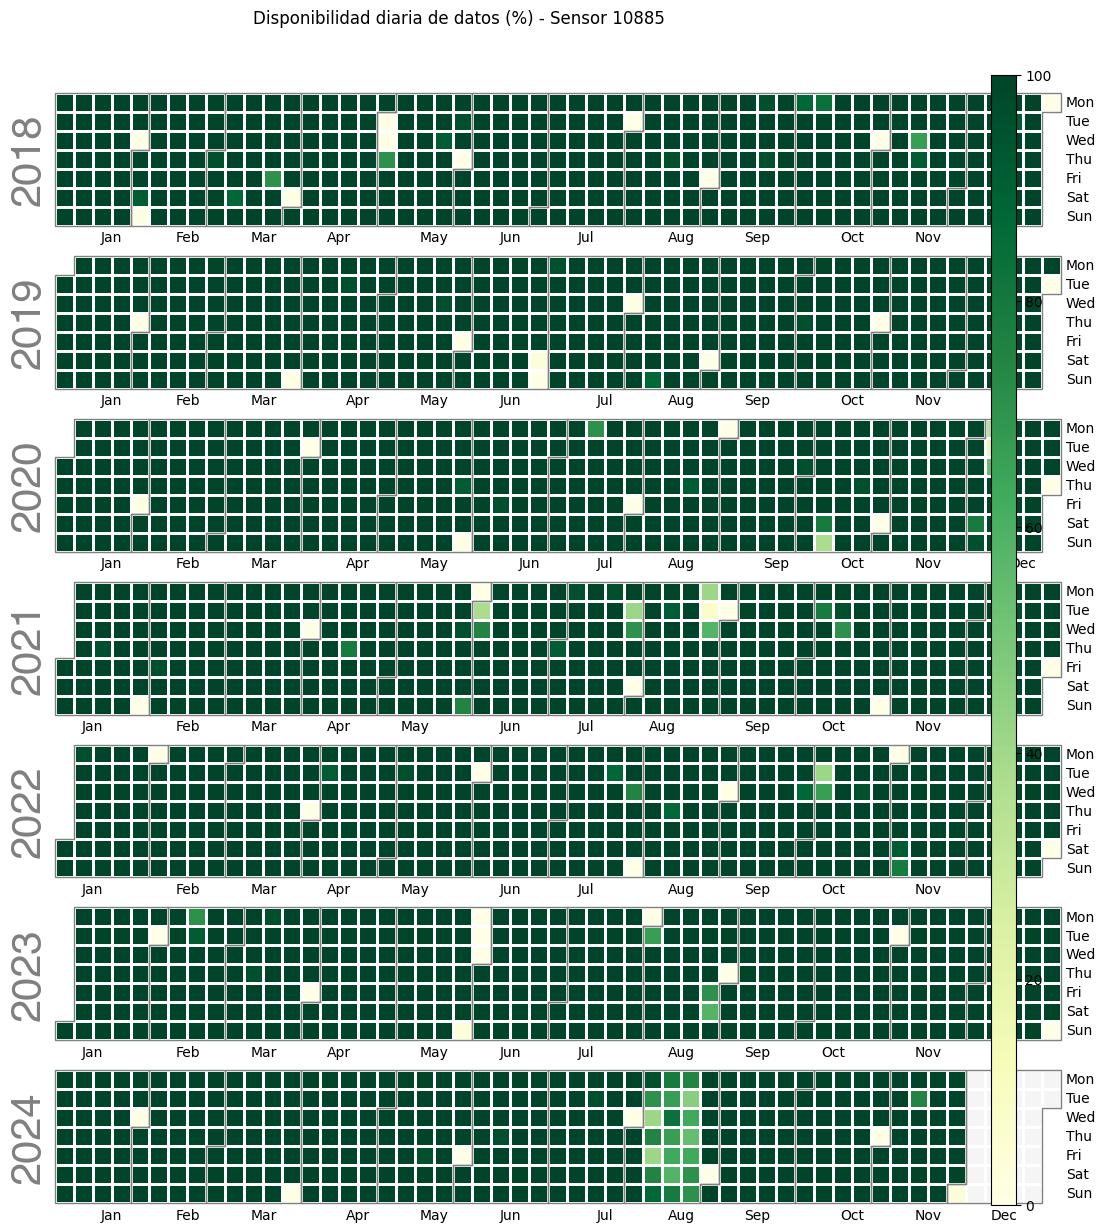

In [62]:
import calplot
import matplotlib.pyplot as plt

# Preparar datos para el calendario
df_completo['fecha'] = pd.to_datetime(df_completo['fecha'])
datos_diarios = df_completo.groupby('fecha')['tiene_datos'].sum()
datos_diarios = datos_diarios / 24 * 100  # Convertir a porcentaje de completitud

# Crear visualización de calendario
plt.figure(figsize=(16, 10))
calplot.calplot(datos_diarios, cmap='YlGn', 
               fillcolor='whitesmoke',
               vmin=0, vmax=100, 
               suptitle=f'Disponibilidad diaria de datos (%) - Sensor {10885}')
plt.tight_layout()
plt.show()

In [65]:
# Ver cuántos id_trafico están asignados a cada id_no2
resumen = df.groupby('id_no2')['id_trafico'].nunique().reset_index()
resumen.columns = ['id_no2', 'num_sensores_trafico']
print("Número de sensores de tráfico asignados a cada sensor NO2:")
print(resumen.sort_values(by='num_sensores_trafico', ascending=False))

# Identificar sensores NO2 sin sensores de tráfico asignados
sin_trafico = resumen[resumen['num_sensores_trafico'] == 0]['id_no2'].tolist()
if sin_trafico:
    print(f"\nSensores NO2 sin sensores de tráfico asignados: {sin_trafico}")

Número de sensores de tráfico asignados a cada sensor NO2:
      id_no2  num_sensores_trafico
12  28079056                    14
0   28079004                    10
2   28079011                     8
7   28079039                     7
5   28079036                     6
1   28079008                     5
4   28079035                     4
10  28079048                     4
6   28079038                     3
3   28079016                     2
8   28079040                     2
9   28079047                     2
11  28079050                     2


In [86]:
# Para cada id_no2, quedarse solo con el id_trafico que tenga mas datos y añadir una nueva columna con el numero de datos, el inicio y el fin de los dato

import pandas as pd

# Paso 1: Calcular métricas para cada combinación id_no2 y id_trafico
stats_trafico = df.groupby(['id_no2', 'id_trafico']).agg(
    num_registros=('fecha', 'count'),
    fecha_inicio=('fecha', 'min'),
    fecha_fin=('fecha', 'max')
).reset_index()

# Paso 2: Para cada id_no2, encontrar el id_trafico con más datos
mejor_trafico = stats_trafico.sort_values(['id_no2', 'num_registros'], ascending=[True, False])
mejor_trafico = mejor_trafico.groupby('id_no2').first().reset_index()

# Paso 3: Añadir columnas informativas
mejor_trafico['periodo_dias'] = (mejor_trafico['fecha_fin'] - mejor_trafico['fecha_inicio']).dt.days
mejor_trafico['densidad_datos'] = mejor_trafico['num_registros'] / mejor_trafico['periodo_dias'].clip(lower=1)

# Paso 4: Unir con el DataFrame original para mantener solo las filas con mejores sensores
df_filtrado = pd.merge(
    df,
    mejor_trafico[['id_no2', 'id_trafico']],
    on=['id_no2', 'id_trafico'],
    how='inner'
)

# Paso 5: Añadir las métricas calculadas al DataFrame filtrado
df_final = pd.merge(
    df_filtrado,
    mejor_trafico[['id_no2', 'id_trafico', 'num_registros', 'fecha_inicio', 'fecha_fin', 'periodo_dias', 'densidad_datos']],
    on=['id_no2', 'id_trafico'],
    how='left'
)

# Mostrar resumen del resultado
print(f"DataFrame original: {len(df)} filas, {df['id_no2'].nunique()} sensores NO2, {df['id_trafico'].nunique()} sensores tráfico")
print(f"DataFrame filtrado: {len(df_final)} filas, {df_final['id_no2'].nunique()} sensores NO2, {df_final['id_trafico'].nunique()} sensores tráfico")

# Mostrar información sobre los mejores sensores de tráfico seleccionados
print("\nResumen de mejores sensores de tráfico seleccionados:")
resumen = mejor_trafico[['id_no2', 'id_trafico', 'num_registros', 'periodo_dias']].sort_values('num_registros', ascending=False)
print(resumen.head(20))  # Muestra los 10 primeros

# Opcionalmente, guardar el DataFrame filtrado
# df_final.to_csv('datos_filtrados_mejor_trafico.csv', index=False)

DataFrame original: 3269056 filas, 13 sensores NO2, 69 sensores tráfico
DataFrame filtrado: 743413 filas, 13 sensores NO2, 13 sensores tráfico

Resumen de mejores sensores de tráfico seleccionados:
      id_no2 id_trafico  num_registros  periodo_dias
11  28079050       5465          59315          2526
10  28079048       4461          59291          2526
8   28079040       5783          59240          2526
9   28079047       4129          58979          2526
7   28079039       5422          58813          2526
12  28079056       5084          58766          2526
6   28079038       4472          58630          2526
1   28079008       4022          58618          2526
2   28079011       3911          57903          2526
5   28079036       6116          57173          2526
3   28079016       3791          56290          2526
4   28079035       3731          51678          2526
0   28079004       4284          48717          2526


In [87]:
# filtrar el df original para quedarnos con estos id_trafico y los id_no2 que tengan asignados
df_filtered = df[df['id_trafico'].isin(mejor_trafico['id_trafico'])]
df_filtered = df_filtered[df_filtered['id_no2'].isin(mejor_trafico['id_no2'])]

In [92]:
df_filtered.to_parquet("no2_with_traffic_and_meteo_one_station_filtered_with_best_trafic_id.parquet", index=False)

Periodo: 2018-01-01 00:00:00 a 2024-12-01 00:00:00
Total de horas en el periodo: 60625
Horas con datos: 59315 (97.84%)
Horas sin datos: 1310 (2.16%)


/var/folders/kc/t6c9n8gj7mbblj0w7sy3ykwm0000gn/T/ipykernel_81765/3775072505.py:18: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/kc/t6c9n8gj7mbblj0w7sy3ykwm0000gn/T/ipykernel_81765/3775072505.py:57: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1600x1000 with 0 Axes>

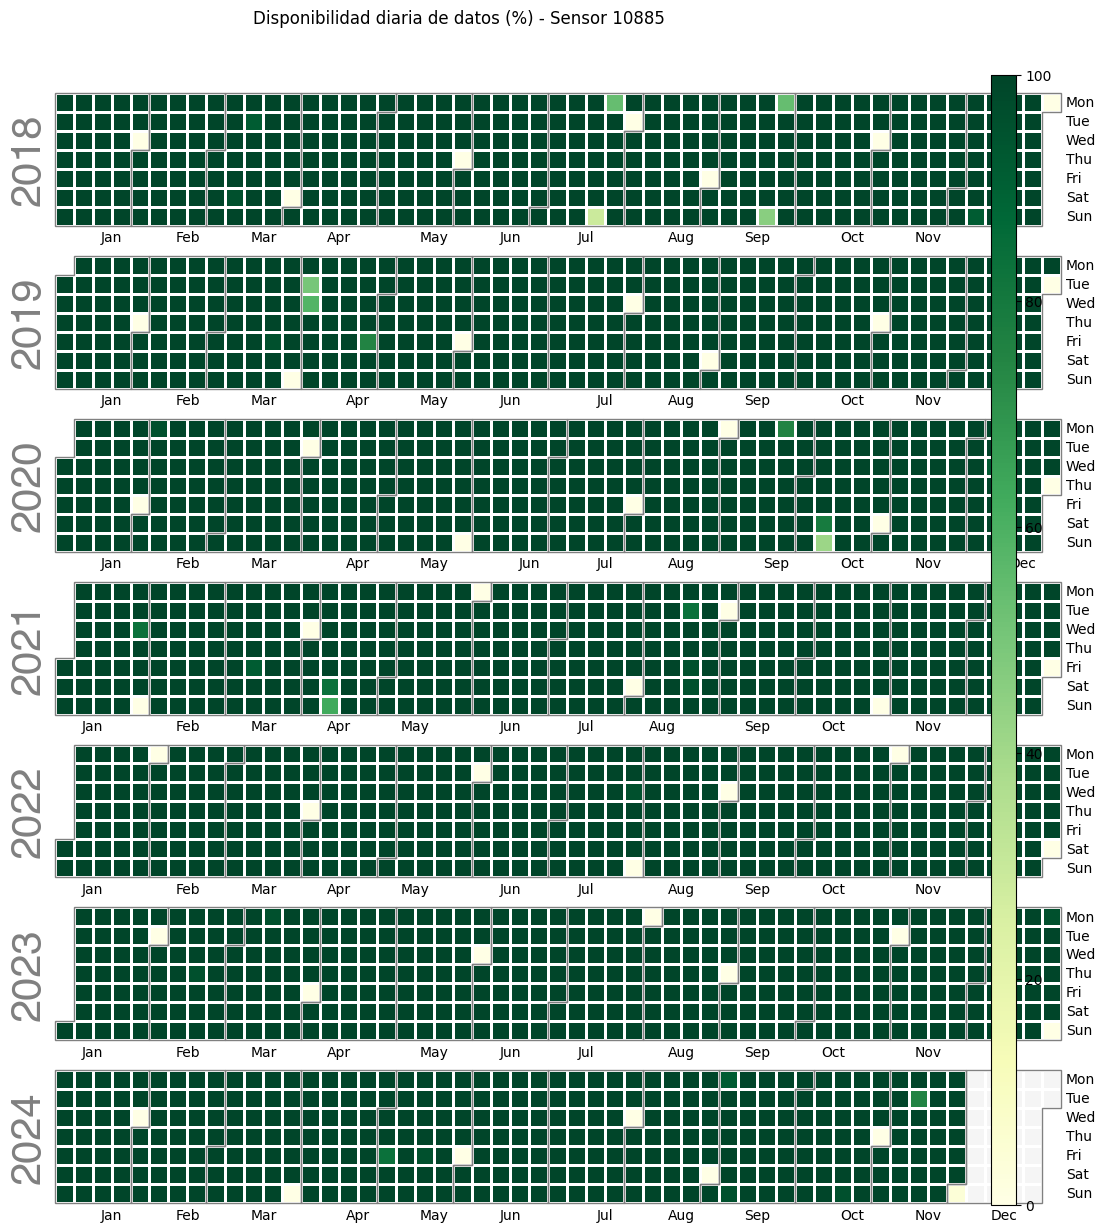

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
from datetime import timedelta
import seaborn as sns
import altair as alt
import calplot  # Asegúrate de tener instalada la librería: pip install calplot

@st.cache_data(ttl=3600)
def cargar_datos_trafico_y_meteo():
    """Carga y preprocesa los datos con caché"""
    df = pd.read_parquet('data/more_processed/no2_with_traffic_and_meteo_one_station.parquet')
    df['fecha'] = pd.to_datetime(df['fecha'])
    return df

def analisis_sensores():
    """Función para el análisis comparativo de sensores de tráfico y NO2."""
    
    st.markdown('<div class="sub-header">🚗 Análisis de sensores de tráfico y su relación con NO₂</div>', unsafe_allow_html=True)

    # Información contextual
    with st.expander("ℹ️ Acerca de este análisis", expanded=False):
        st.markdown("""
        <div class="info-box">
        <p>Este panel permite analizar la relación entre los datos de tráfico y los niveles de NO₂ en Madrid.</p>
        </div>
        """, unsafe_allow_html=True)

    # ---- Manejo del estado ----
    if "df_master" not in st.session_state:
        st.session_state.df_master = None

    if st.button("Cargar datos") or st.session_state.df_master is not None:
        if st.session_state.df_master is None:
            with st.spinner('Cargando datos...'):
                try:
                    st.session_state.df_master = cargar_datos_trafico_y_meteo()
                except Exception as e:
                    st.error(f"Error al cargar los datos: {str(e)}")
                    return

        df = st.session_state.df_master

        # --- Controles de configuración ---
        st.markdown('<div class="sub-header">⚙️ Configuración</div>', unsafe_allow_html=True)
        col1, col2 = st.columns([1, 2])
        
        with col1:
            sensores = sorted(df["id_no2"].unique())
            sensor_seleccionado = st.selectbox("Selecciona un sensor de NO₂", sensores, index=0)
            
            # Filtro de fechas
            fecha_min = df["fecha"].min().date()
            fecha_max = df["fecha"].max().date()
            fecha_inicio = st.date_input("Fecha inicial", fecha_min, min_value=fecha_min, max_value=fecha_max, key="sensor_fecha_inicio")
            fecha_fin = st.date_input("Fecha final", fecha_max, min_value=fecha_min, max_value=fecha_max, key="sensor_fecha_fin")
            
            if fecha_inicio > fecha_fin:
                st.error("⚠️ La fecha inicial debe ser anterior a la fecha final")
                fecha_fin = fecha_inicio + timedelta(days=7)
            
            # Granularidad temporal
            granularity = st.radio("Granularidad", ["Horaria", "Diaria", "Semanal", "Mensual"], horizontal=True)
            
            # Variables a analizar
            variables_disponibles = ['intensidad', 'carga', 'ocupacion', 'd2m', 't2m', 'sst', 'ssrd', 'u10', 'v10', 'sp', 'tp']
            variables_disponibles = [var for var in variables_disponibles if var in df.columns]
            variables_seleccionadas = st.multiselect("Selecciona variables a comparar con NO₂", variables_disponibles, default=variables_disponibles)
            
            # Opciones de visualización
            mostrar_correlacion = st.checkbox("Mostrar matriz de correlación", value=True)

            df_filtrado = df[(df["id_no2"] == sensor_seleccionado) & 
                             (df["fecha"].dt.date >= fecha_inicio) & 
                             (df["fecha"].dt.date <= fecha_fin)].copy()

        with col2:
            if df_filtrado.empty:
                st.error("⚠️ No hay datos disponibles para el sensor y rango de fechas seleccionados.")
                return
            
            # Configurar granularidad para análisis de variables (agregación)
            if granularity == "Horaria":
                df_filtrado["time_group"] = df_filtrado["fecha"].dt.floor("H")
            elif granularity == "Diaria":
                df_filtrado["time_group"] = df_filtrado["fecha"].dt.floor("D")
            elif granularity == "Semanal":
                df_filtrado["time_group"] = df_filtrado["fecha"].dt.to_period("W").dt.to_timestamp()
            else:  # Mensual
                df_filtrado["time_group"] = df_filtrado["fecha"].dt.to_period("M").dt.to_timestamp()
            
            if granularity != "Horaria":
                variables_agg = ["no2_value"] + variables_seleccionadas
                df_agregado = df_filtrado.groupby(["time_group"]).agg({var: "mean" for var in variables_agg}).reset_index()
            else:
                df_agregado = df_filtrado

            # --- Sección de visualizaciones ---
            st.markdown('<div class="sub-header">📊 Análisis comparativo de variables</div>', unsafe_allow_html=True)

            if mostrar_correlacion and len(variables_seleccionadas) >= 1:
                st.markdown("### Matriz de correlación")
                corr_data = df_agregado[["no2_value"] + variables_seleccionadas].corr()
                fig, ax = plt.subplots(figsize=(20, 8))
                mask = np.triu(np.ones_like(corr_data, dtype=bool))
                cmap = sns.diverging_palette(230, 20, as_cmap=True)
                sns.heatmap(corr_data, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5, ax=ax)
                plt.title('Correlación entre NO₂ y variables seleccionadas')
                st.pyplot(fig)
            
            # --- Calplot de continuidad de datos ---
            st.markdown('<div class="sub-header">📅 Continuidad de datos (Calplot)</div>', unsafe_allow_html=True)
            # Para la visualización de continuidad, usaremos el dataframe original filtrado a nivel horario.
            # Se asume que los datos deberían estar registrados cada hora.
            fecha_min_sensor = df_filtrado['fecha'].min()
            fecha_max_sensor = df_filtrado['fecha'].max()
            todas_horas = pd.date_range(start=fecha_min_sensor, end=fecha_max_sensor, freq='H')
            
            # Crear DataFrame con todas las horas esperadas
            df_completo = pd.DataFrame(index=todas_horas)
            df_completo.index.name = 'hora'
            df_sensor_hora = df_filtrado.set_index('fecha')
            df_completo['tiene_datos'] = df_completo.index.isin(df_sensor_hora.index).astype(int)
            
            # Cálculo de completitud diaria (porcentaje de horas con datos)
            df_completo['fecha'] = df_completo.index.date
            datos_diarios = df_completo.groupby('fecha')['tiene_datos'].sum()
            datos_diarios = datos_diarios / 24 * 100  # Convertir a porcentaje

            # Crear visualización de calendario
            fig_calplot = plt.figure(figsize=(16, 10))
            calplot.calplot(datos_diarios,
                            cmap='YlGn', 
                            fillcolor='whitesmoke',
                            vmin=0, vmax=100,
                            suptitle=f'Continuidad de datos (%) - Sensor {sensor_seleccionado}')
            plt.tight_layout()
            st.pyplot(fig_calplot)
